In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [3]:
X = np.array([
    [4, 5, 6, 7, 2, -1, 0, -1],
    [1, 4, 3, 4, -1, -2, -3, -4]
])

X.shape

(2, 8)

# centering the data

In [4]:
X_mean = X.mean(axis=1)
X_mean

array([2.75, 0.25])

In [5]:
X_centered = X - X_mean.reshape(2, 1)
X_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

In [6]:
X_centered_mean = X_centered.mean(axis=1)
X_centered_mean

array([0., 0.])

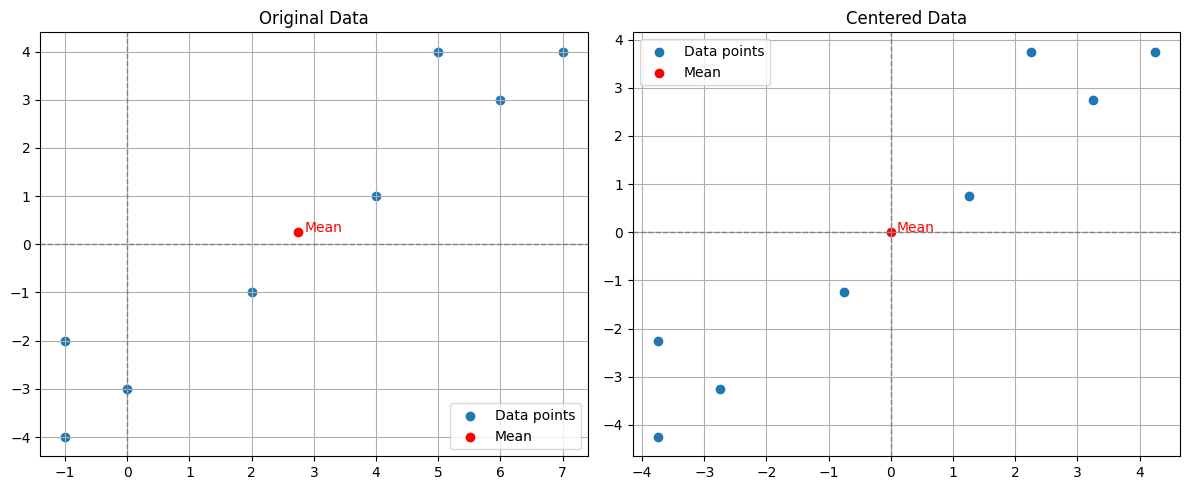

In [7]:
def plot_data_and_mean(X, X_mean, ax, title):
  ax.scatter(X[0], X[1], label="Data points")
  ax.scatter(*X_mean, color='red', label="Mean")
  ax.text(X_mean[0] + 0.1, X_mean[1], 'Mean', color='red')
  ax.axvline(0, color='gray', linestyle='--', linewidth=1)
  ax.axhline(0, color='gray', linestyle='--', linewidth=1)
  ax.grid(True)
  ax.legend()
  ax.set_title(title)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_data_and_mean(X, X_mean, axes[0], "Original Data")
plot_data_and_mean(X_centered, X_centered_mean, axes[1], "Centered Data")

plt.tight_layout()

# calculating co-variance matrix `C`

In [8]:
n = X_centered.shape[1]

C = X_centered @ X_centered.T / n

C
C.shape

array([[8.9375, 8.5625],
       [8.5625, 8.9375]])

(2, 2)

# compute the eigenvectors and eigenvalues

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors.T[sorted_indices]

for i, eigenvalue in enumerate(eigenvalues):
  print(f"Eigenvalue {i+1}: {eigenvalue}")
  print(f"Eigenvector {i+1}: {eigenvectors[i]}")
  variance_explained = eigenvalue / eigenvalues.sum()
  print(f"Variance explained by Eigenvalue {i+1}: {variance_explained:.2%}\n")

Eigenvalue 1: 17.5
Eigenvector 1: [0.7071 0.7071]
Variance explained by Eigenvalue 1: 97.90%

Eigenvalue 2: 0.375
Eigenvector 2: [-0.7071  0.7071]
Variance explained by Eigenvalue 2: 2.10%



In [10]:
np.dot(eigenvectors[0], eigenvectors[1])

np.float64(0.0)

In [11]:
X_transformed = eigenvectors @ X_centered

X_transformed
X_transformed.shape

array([[ 1.4142,  4.2426,  4.2426,  5.6569, -1.4142, -4.2426, -4.2426,
        -5.6569],
       [-0.3536,  1.0607, -0.3536, -0.3536, -0.3536,  1.0607, -0.3536,
        -0.3536]])

(2, 8)

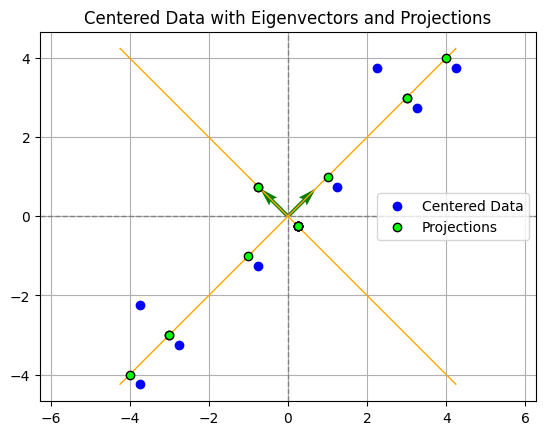

In [12]:
def plot_eigenvectors(X_centered, eigenvectors, X_transformed):
  plt.scatter(X_centered[0], X_centered[1], label="Centered Data", color='blue')

  plt.axvline(0, color='gray', linestyle='--', linewidth=1)
  plt.axhline(0, color='gray', linestyle='--', linewidth=1)

  # Plot full lines through each eigenvector
  for i, vec in enumerate(eigenvectors):
    line = np.outer(vec, np.linspace(-6, 6, 100))
    plt.plot(line[0], line[1], color='orange', linewidth=1)
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='green')

  # Projections onto both eigenvector directions
  for i in range(X_transformed.shape[1]):
    proj1 = eigenvectors[0] * X_transformed[0, i]
    proj2 = eigenvectors[1] * X_transformed[1, i]

    plt.scatter(proj1[0], proj1[1], color='lime', edgecolor='black', zorder=3)
    plt.scatter(proj2[0], proj2[1], color='lime', edgecolor='black', zorder=3, label="Projections" if i == 0 else "")

  plt.title("Centered Data with Eigenvectors and Projections")
  plt.axis('equal')
  plt.grid(True)
  plt.legend()
  plt.show()


plot_eigenvectors(X_centered, eigenvectors, X_transformed)